In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Canny Edge Detection
    경계선 검출 방식에서 가장 많이 사용하는 알고리즘이다. 일반적으로 경계선 검출기는 잡음에 매우 민감한 특성을 가지고 있다. 따라서 잡음으로 인해 잘못된 경계선을 계산하는 것을 방지하기 위해 개발 된 알고리즘이다. Canny 알고리즘은 다음의 5가지 단계를 거친다.
    1. Gaussian Filter로 이미지의 잡음을 제거한다.
    2. Sobel Filter를 사용하여 Gradient의 크기(intensity)를 구한다.
    3. Non-maximum suppression을 적용하여 경계선 검출기에서 거짓 반응을 제거한다.
    4. 경계선으로써 가능성 있는 픽셀을 골라내기 위해 double threshold 방식을 적용한다.
    5. 앞서 double threshold 방식에서 maxVal을 넘은 부분을 strong edge, minVal과 maxVal 사이의 부분을 weak edge로 설정하여 strong edge와 연결되어 있는 weak edge를 edge로 판단하고 그렇지 않는 부분은 제거한다. (Hysteresis thresholding)
    
    openCV에서는 해당 알고리즘의 계산을 수행하는 Canny 함수가 존재하여 Canny algorithm을 구현하기 위해 고생할 필요가 없다.
    
## cv2.Canny(image, threshold1, threshold2 [, edges [, apertureSize [, L2gradient]]]) → edges 
    1. image : 8bit 입력 이미지
    2. threshold1 : Canny 알고리즘의 마지막 단계인 Hysteresis를 수행하기 위한 임계값 1
    3. threshold2 : Canny 알고리즘의 마지막 단계인 Hysteresis를 수행하기 위한 임계값 2
    4. apertureSize : Sobel Filter의 크기를 결정한다. Sobel 함수와 마찬가지로 3, 5, 7 만 지정할 수 있다.
    threshold1과 threshold2 중에서 큰 값은 strong edge를 구하기 위한 임계값으로, 작은 값은 weak edge를 구하기 위한 임계값으로 결정된다. 일반적으로 threshold1이 threshold2보다 작게 지정한다.

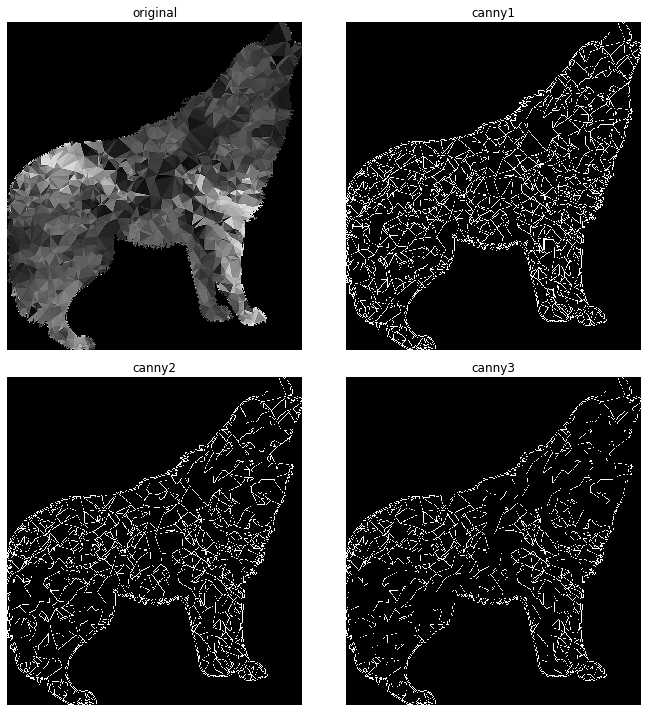

In [2]:
img3 = cv2.imread('howling-1254383_640.png', cv2.IMREAD_GRAYSCALE)

canny1 = cv2.Canny(img3, 50, 200)
canny2 = cv2.Canny(img3, 100, 200)
canny3 = cv2.Canny(img3, 170, 200)

titles = ['original', 'canny1', 'canny2', 'canny3']
images = [img3, canny1, canny2, canny3]

cv2.imshow('original', img3)
cv2.imshow('canny1', canny1)
cv2.imshow('canny2', canny2)
cv2.imshow('canny3', canny3)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [3]:
def onChange(x):
    pass

def edge_detection2():
    img3 = cv2.imread('howling-1254383_640.png', cv2.IMREAD_GRAYSCALE)
    cv2.namedWindow('edge detection')
    
    cv2.createTrackbar('low threshold', 'edge detection', 0, 255, onChange)
    cv2.createTrackbar('high threshold', 'edge detection', 0, 255, onChange)
    cv2.imshow('edge detection', img3)
    
    while True:
        k = cv2.waitKey(0) & 0xFF
        
        if k == 27:
            break
            
        low = cv2.getTrackbarPos('low threshold', 'edge detection')
        high = cv2.getTrackbarPos('high threshold', 'edge detection')
        
        if low > high:
            print("Low threshold must be low than high threshold")
        
        elif ((low == 0) and (high == 0)):
            cv2.imshow('edge detection', img3)
        
        else:
            canny = cv2.Canny(img3, low, high)
            cv2.imshow('edge detection', canny)
    
    cv2.destroyAllWindows()

In [4]:
edge_detection2()

Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold
Low threshold must be low than high threshold


# Video Edge Detection (with Canny algorithm)

In [7]:
def onChange(x):
    pass

def edge_tracking():
    try:
        print("비디오 재생")
        cap = cv2.VideoCapture('KakaoTalk_20200724_175615914.mp4')
        cv2.namedWindow('edge tracking')
        cv2.createTrackbar('Low threshold', 'edge tracking', 0, 255, onChange)
        cv2.createTrackbar('High threshold', 'edge tracking', 0, 255, onChange)
    except:
        print("비디오 재생 실패")
        return
    
    
    while True:
        ret, frame = cap.read()
        
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            k = cv2.waitKey(0) & 0xFF
            if k == 27:
                break
            
            low = cv2.getTrackbarPos('Low threshold', 'edge tracking')
            high = cv2.getTrackbarPos('High threshold', 'edge tracking')

            if low > high:
                print("Low threshold must be low than high threshold")
                continue

            elif (low == 0) and (high == 0):
                cv2.imshow('edge tracking', frame)

            else:
                frame = cv2.Canny(frame, low, high)
                cv2.imshow('edge tracking', frame)
                        
        # 마지막 프레임을 읽었을 때 영상을 빠져나옴
        else:
            print("비디오 종료")
            break
    
    cap.release()
    cv2.destroyAllWindows()

In [8]:
edge_tracking()

비디오 재생
